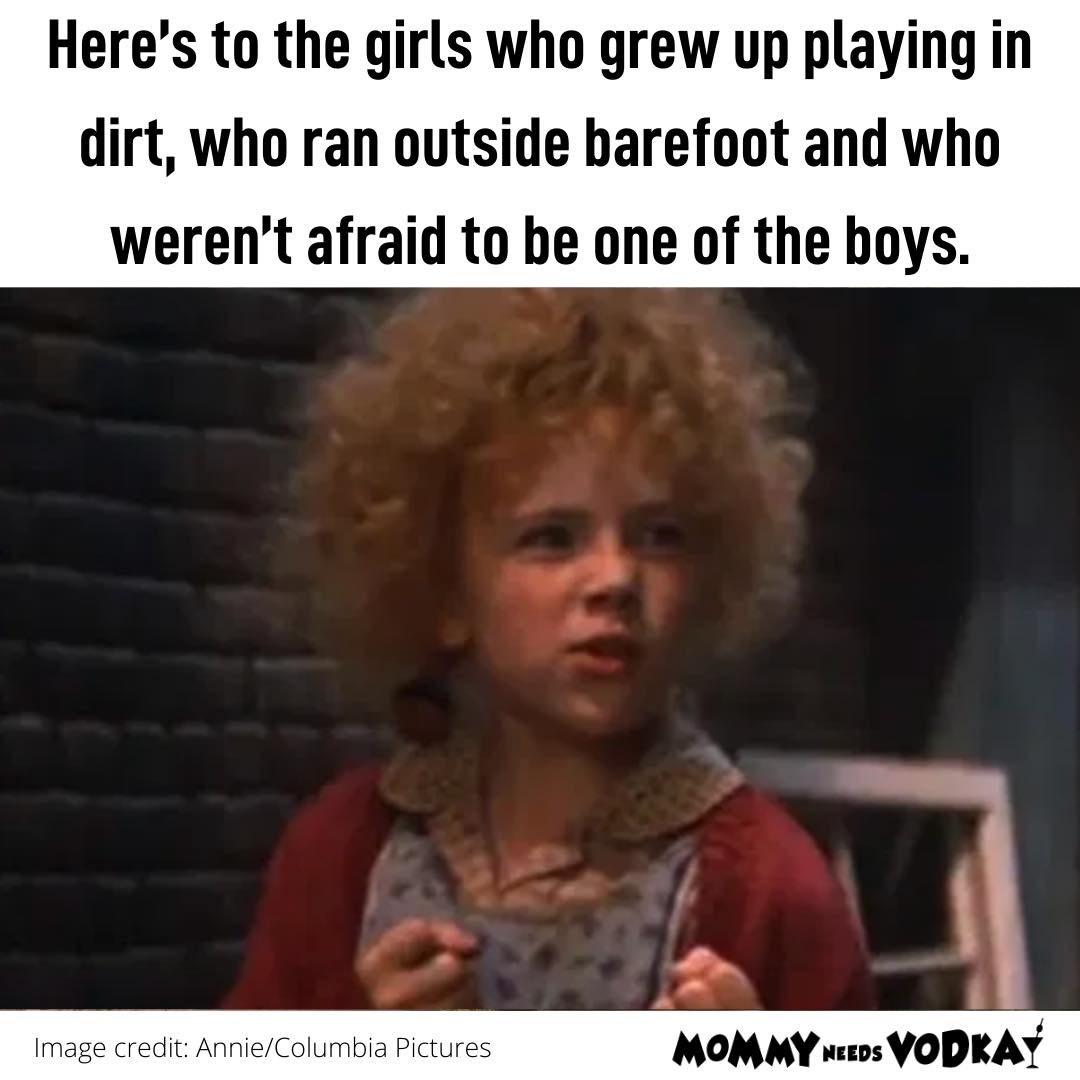

From: https://www.facebook.com/photo/?fbid=355821105906790&set=a.288137412675160

In [1]:
#Importing the libraries 

from textblob import TextBlob
# needed for the library to work in Google Colab
import nltk
nltk.download('punkt')

nltk.download('stopwords')
from nltk.corpus import stopwords

from wordcloud import WordCloud

import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt
%matplotlib inline


# for more styles, please follow https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use('bmh')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
#Run this code to upload the files csv
from google.colab import files
uploaded = files.upload()

Saving NltK.csv to NltK.csv


In [8]:
book=pd.read_csv('NltK.csv') #read the csv file 

In [9]:
book.head(5)

,test
0,happy
1,sad


## 1. Turns comments into lowercase

In [12]:
book['test']=book['test'].str.lower() #converts the comment column to lower case
book.head(2)

,test
0,happy
1,sad


## 2. Get rid of stop words

In [13]:
stop_words = stopwords.words("english") 

In [19]:
book['stop word'] = book['test'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)])) #using lambda function split words and remove it
book.head(2)

,test,subjectivity,stop word
0,happy,1.0,happy
1,sad,1.0,sad


## 3. creates a new column that evaluates the subjectivity of the comments

In [18]:
book['subjectivity'] = book['test'].apply(lambda sub: TextBlob(sub).sentiment.subjectivity) #creates a column with subjectivity of the comment
book.head(2)

,test,subjectivity
0,happy,1.0
1,sad,1.0


## 4. creates a new column that evaluates the polarity of the comments


In [21]:
book['polarity'] = book['test'].apply(lambda sub: TextBlob(sub).sentiment.polarity) #creates a column with polarity of the comment
book.head(2)

,test,subjectivity,stop word,polarity
0,happy,1.0,happy,0.8
1,sad,1.0,sad,-0.5


## 5. Adds the category based on the scoring.


In [22]:
#function to create categories
def scoring(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neautral'
  elif score>0 and score<=1:
     return "Positive"
       
  

In [23]:
# defining categories based on the polarity score

book['scoring_polarity'] = book['polarity'].apply(scoring)
book.head()

,test,subjectivity,stop word,polarity,scoring_polarity
0,happy,1.0,happy,0.8,Positive
1,sad,1.0,sad,-0.5,Negative
